# German_Traffic_Sign_Recognition
## About Dataset
### Context
The [German Traffic Sign Benchmark](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?datasetId=82373)
 is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

* Single-image, multi-class classification problem
* More than 40 classes
* More than 50,000 images in total
* Large, lifelike database

**Acknowledgements** \
INI Benchmark Website


## Imports

In [1]:
from libs.datasets.simpledatasetloader import SimpleDatasetLoader
import pathlib
import matplotlib.pyplot as plt
import matplotlib.image as img
import opendatasets as od
import numpy as np
from imutils import paths
import os
import pandas as pd

## Download the dataset

In [2]:
# Download the dataset
dataset_url = 'https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?datasetId=82373'

# Look into the data directory
images_dir = './gtsrb-german-traffic-sign'

images_dir_path = pathlib.Path(images_dir)
if not os.path.isdir(images_dir):
    od.download(dataset_url)

## Dataset Exploration

In [3]:
train_ds_dir = images_dir_path / 'Train'
test_ds_dir = images_dir_path / 'Test'
target_cls_dir = images_dir_path / 'Meta'

In [4]:
train_imgs = list(paths.list_images(train_ds_dir))
test_imgs = list(paths.list_images(test_ds_dir))
target_imgs = list(paths.list_images(target_cls_dir))
print(
    f'train images: {len(train_imgs)}, test images: {len(test_imgs)}, total images: {len(train_imgs) + len(test_imgs)}')

train images: 39209, test images: 12630, total images: 51839


## Visualize datasets

In [5]:
classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

### Target Classes Visualization

In [6]:
target_imgs_list = [img for img in os.listdir(target_cls_dir) if img.split('.')[1]== 'png']
target_imgs_list[:5]

['10.png', '4.png', '3.png', '42.png', '37.png']

In [7]:
len(target_imgs_list)

43

In [8]:
total_classes_list = [cls_num for cls_num in range(len(target_imgs_list))]

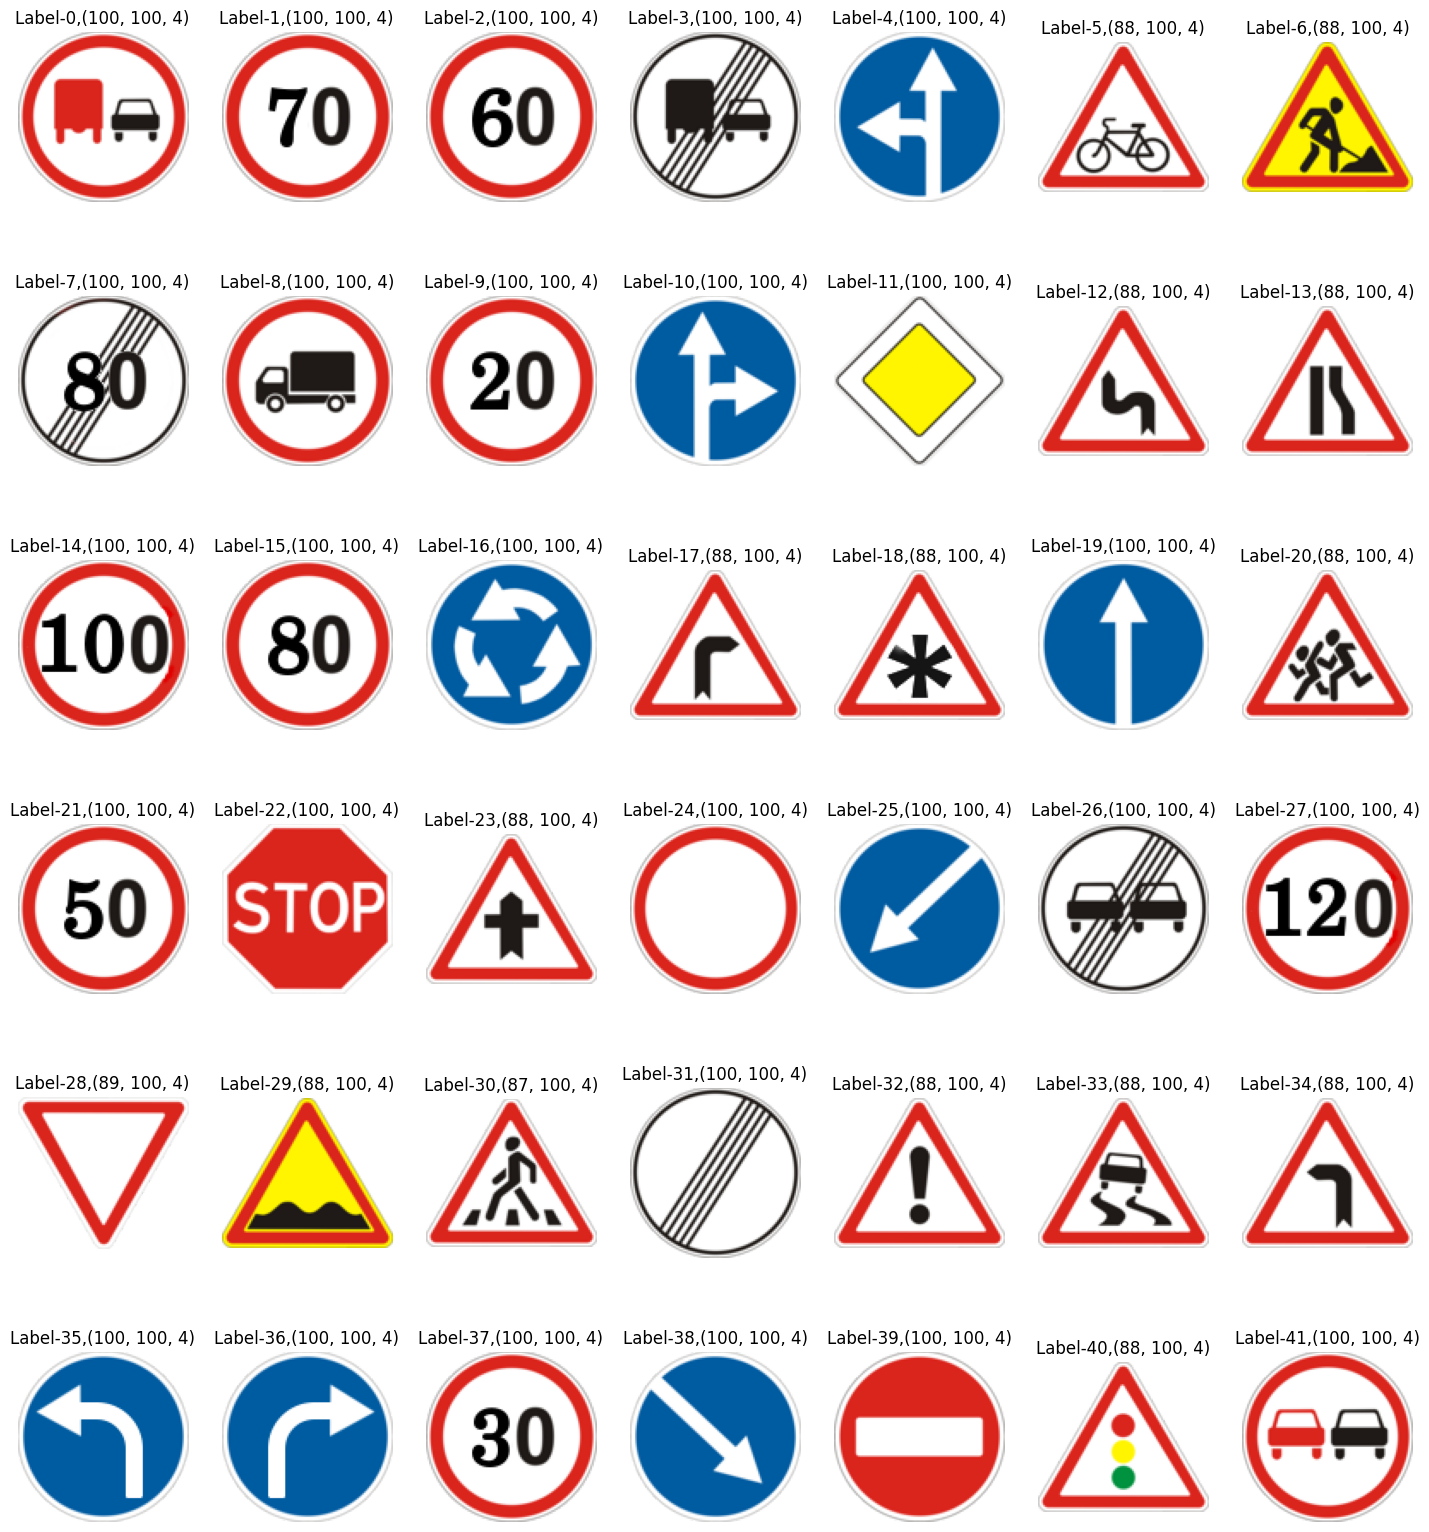

In [9]:
fig, axs = plt.subplots(nrows=6, ncols=7, figsize=(18, 20))

for ax, num in zip(axs.ravel(), total_classes_list):
    _img = img.imread(target_cls_dir/target_imgs_list[num])
    ax.set_title(f'Label-{num},{_img.shape}')
    ax.axis('off')
    ax.imshow(_img)

### Training Dataset Visualization

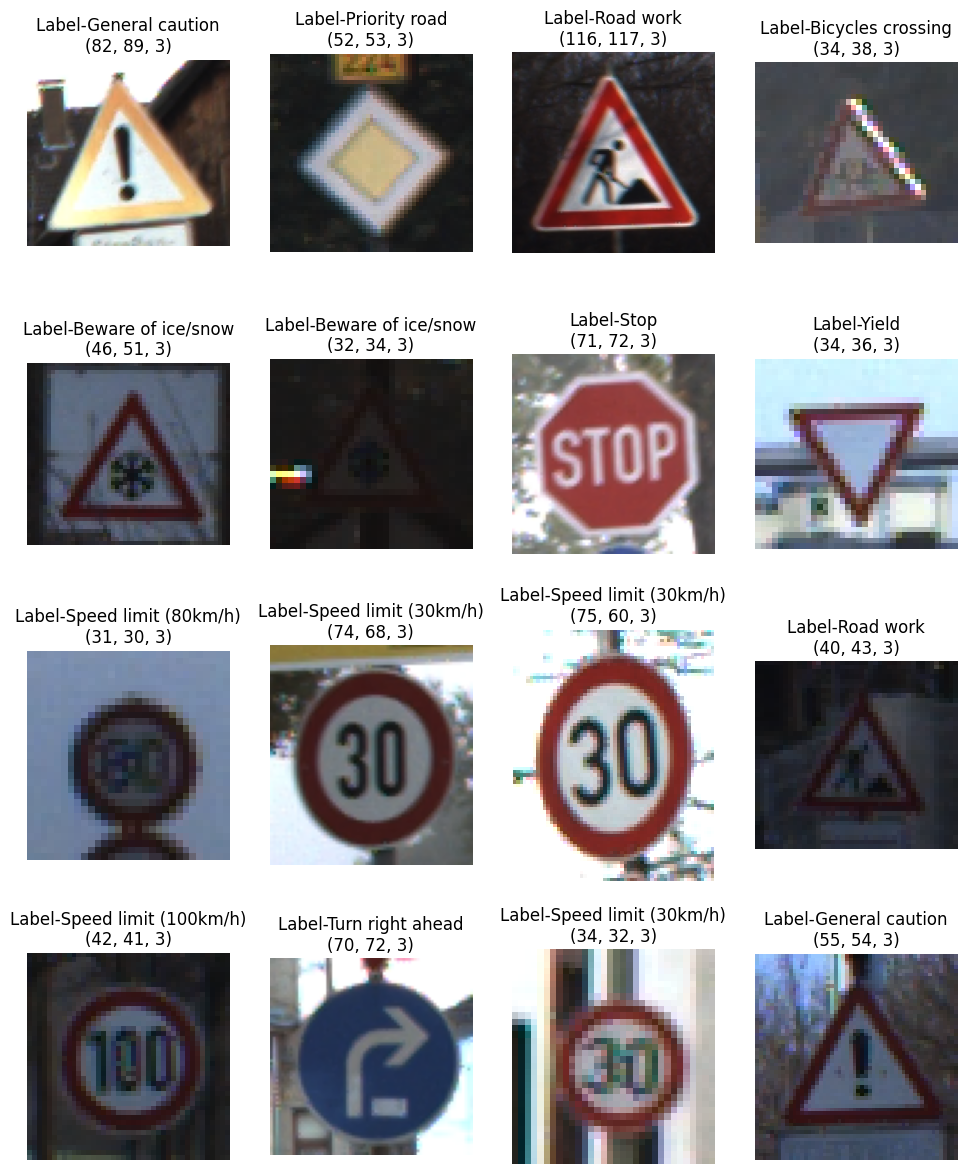

In [10]:
random_num_array = np.random.randint(len(train_imgs), size=16)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12, 15))

for ax, num in zip(axs.ravel(), random_num_array):
    _img = img.imread(train_imgs[num])
    _label = int(train_imgs[num].split('/')[-2])
    ax.set_title(f'Label-{classes[_label]}\n{_img.shape}')
    ax.axis('off')
    ax.imshow(_img)



**Observation**
1. Total 42 classes with total images - 51839 (train images: 39209, test images: 12630) 
2. All the images have different sizes and different lighting

In [11]:
images_per_class = {}


In [12]:
classes_dirs = os.listdir(train_ds_dir)
for cls_name in classes_dirs:
    images_per_class[int(cls_name)] = len(os.listdir(train_ds_dir/f'{cls_name}'))

In [13]:
images_per_class

{6: 420,
 11: 1320,
 35: 1200,
 39: 300,
 5: 1860,
 15: 630,
 18: 1200,
 34: 420,
 37: 210,
 30: 450,
 1: 2220,
 40: 360,
 16: 420,
 12: 2100,
 31: 780,
 28: 540,
 3: 1410,
 9: 1470,
 4: 1980,
 25: 1500,
 41: 240,
 21: 330,
 38: 2070,
 0: 210,
 27: 240,
 32: 240,
 14: 780,
 22: 390,
 8: 1410,
 10: 2010,
 24: 270,
 19: 210,
 33: 689,
 7: 1440,
 17: 1110,
 13: 2160,
 36: 390,
 23: 510,
 26: 600,
 42: 240,
 2: 2250,
 20: 360,
 29: 270}

In [14]:
cls_df = pd.DataFrame.from_dict(classes, orient='index', columns=['classes'])
cls_df2 = pd.DataFrame.from_dict(images_per_class, orient='index', columns=['total_images'])
df = pd.concat([cls_df, cls_df2], axis=1)
df.head()

,classes,total_images
0,Speed limit (20km/h),210
1,Speed limit (30km/h),2220
2,Speed limit (50km/h),2250
3,Speed limit (60km/h),1410
4,Speed limit (70km/h),1980


<Figure size 2000x2000 with 0 Axes>

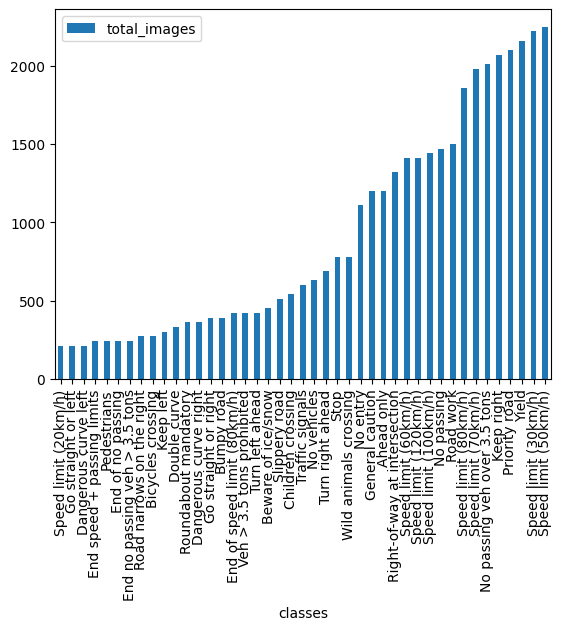

<Figure size 2000x2000 with 0 Axes>

In [15]:
df.sort_values(by='total_images').plot.bar(x='classes', y='total_images')
plt.figure(figsize=(20, 20))


Finding images with **minimum** training images

In [16]:
df[df.total_images == df.total_images.min()]

,classes,total_images
0,Speed limit (20km/h),210
19,Dangerous curve left,210
37,Go straight or left,210


finding images with **maximum** training images

In [17]:
df[df.total_images == df.total_images.max()]

,classes,total_images
2,Speed limit (50km/h),2250


**Observation**
1. Dataset are heavily unbalanced
   Following classes have **minimum (212)** training images
   1.  `speed limit (20km/h)` 
   2.  `Dangerous curve left`
   3.  `Go straight or left`

   And following class has **maximum (2250)** training images
    1. `Speed limit (50km/h)`	